In [19]:
#Compare Shad and Emily's Output
#import external libraries
import pandas as pd
import os
#pd.options.mode.chained_assignment = None  # default='warn'; chained index warning
import numpy as np
import imp
import datetime
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy


#plotting
%matplotlib notebook

#import self-written libraries
import LVL1
import LVL2

In [20]:
#time format and column
Local_time_column_name='Local_time'
date_format='%Y/%m/%d %H:%M'


In [21]:
#Hourly Data
timing='hourly'
shad_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL2\wolverine_990_hourly_LVL2.csv")
emily_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL2\emily\wolverine990_hourly_LVL2.csv")
raw_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL0\emily\wolverine990_15min_all.csv")
krista_dat=pd.read_csv(r"Q:\Project Data\GlacierData\WOLVERINE\Waterbudget_20170922\Met station data\WolverineFilledWx_kfm.csv")


In [22]:
# #Daily Data
# timing='daily'
# shad_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL2\wolverine_990_DailyShortLVL2.csv")
# emily_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL2\emily\wolverine990_daily_LVL2.csv")
# krista_dat=pd.read_csv(r"Q:\Project Data\GlacierData\WOLVERINE\Waterbudget_20170922\Met station data\WolverineFilledWx_kfm.csv")
# raw_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL0\emily\wolverine990_15min_all.csv")

In [23]:
# #L1 Data
# timing='L1'
# shad_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL1\wolverine_990_ALL_15min_LVL1.csv")
# emily_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL1\emily\wolverine990_15minall.csv")
# raw_dat=pd.read_csv(r"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL0\emily\wolverine990_15min_all.csv")
# emily_dat['local_time']=emily_dat.Local_time

In [24]:
shad_dat.head(1)

,Station,Date,TPassive1,TPassive2,TAspirated1,TAspirated2,TSiteBest,RelHum,StagehourlyCatch,StageCumulativeCatch,TPGhourlyCatch,TPGCumulativeCatch,WindSpeed,WindGustSpeed,WindDir
0,wolverine_990,2010/07/01 00:30,4.3,3.9,NaN,NaN,4.1,NaN,0.0,0.0,0.0,0.0,3.3,4.2,NaN


In [25]:
if timing=='hourly': 
    shad_time_col_nm='Date'
if timing=='daily':
    shad_time_col_nm='time'
if timing=='L1':
    shad_time_col_nm='UTC_time'
shad_dat['local_time']=pd.to_datetime(shad_dat[shad_time_col_nm], format= date_format)
shad_dat=shad_dat.set_index('local_time') #set this local time as the index

In [26]:
emily_dat['local_time']=pd.to_datetime(emily_dat['local_time'], format= date_format)
emily_dat=emily_dat.set_index('local_time') #set this local time as the index

In [27]:
raw_dat['local_time']=pd.to_datetime(raw_dat['local_time'], format= date_format)
raw_dat=raw_dat.set_index('local_time') #set this local time as the index

In [28]:
raw_dat.head(1)

,UTC_time,Tpassive1,Tpassive2,TAspirated1,TAspirated2,RelHum,StageCumulative,TPGCumulative,WindSpeed,WindGustSpeed,WindDir,Barom,VecAvgWindDir,RadiationIn,RadiationOut,SnowDepth,LoggerTemp,LoggerBattery
local_time,,,,,,,,,,,,,,,,,,
2009-10-01,2009/10/01 08:00,NaN,0.03,NaN,NaN,NaN,0.2793,NaN,3.3,NaN,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
shad_dat.head(1)

,Station,Date,TPassive1,TPassive2,TAspirated1,TAspirated2,TSiteBest,RelHum,StagehourlyCatch,StageCumulativeCatch,TPGhourlyCatch,TPGCumulativeCatch,WindSpeed,WindGustSpeed,WindDir
local_time,,,,,,,,,,,,,,,
2010-07-01 00:30:00,wolverine_990,2010/07/01 00:30,4.3,3.9,NaN,NaN,4.1,NaN,0.0,0.0,0.0,0.0,3.3,4.2,NaN


In [30]:
emily_dat.tail(1)

,TAspirated1_min,TAspirated1_max,TAspirated1_WMO,TAspirated1_USGS,StageIncremental,TPGIncremental,RelHum,WindSpeed,WindGustSpeed,RadiationIn,RadiationOut,SnowDepth,WindDir,VecAvgWindDir
local_time,,,,,,,,,,,,,,
2017-09-10 16:00:00,4.9,5.5,5.2,5.2,NaN,0.0,94.0,2.5,4.25,NaN,NaN,NaN,NaN,62.2566


In [31]:
#Adjust timing of Shad's data
#Logger records on UTC -8; convert to local time. Shad thought it was just in UTC
if (timing=='hourly') | (timing=='L1'):
    shad_dat['new_time']=shad_dat.index+datetime.timedelta(hours=7.5)
    shad_dat=shad_dat.set_index('new_time')

In [32]:
if timing=='daily':
    shadT1=shad_dat.TMeanUSGS
if timing=='hourly':
    shadT1=shad_dat.TAspirated1

In [33]:
if timing=='L1':
    emilyT1=emily_dat.TAspirated1
    shadT1=shad_dat.TAspirated1

else:
    emilyT1=emily_dat.TAspirated1_USGS
emilyT1.name='Emily'
shadT1.name='Shad'
#raw_dat.TAspirated1.name='Raw temp'

In [34]:
krista_dat.head()

,date,T,P
0,10/1/2010,3.4,27.0
1,10/2/2010,2.1,16.5
2,10/3/2010,-0.4,4.5
3,10/4/2010,-1.0,6.5
4,10/5/2010,0.5,0.0


In [35]:
#Bring in Krista's data
krista_dat['date']=pd.to_datetime(krista_dat.date, format='%m/%d/%Y')
krista_dat=krista_dat.set_index('date')
krista_temp=krista_dat['T']
krista_temp.name='krista'

<IPython.core.display.Javascript object>


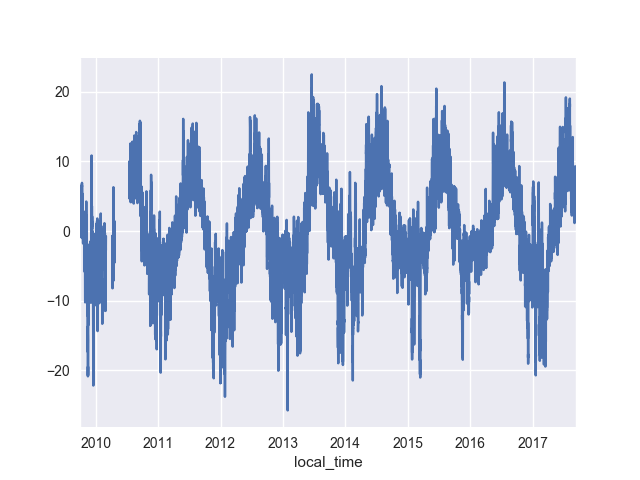

In [43]:
%matplotlib notebook
emilyT1.plot()

<IPython.core.display.Javascript object>


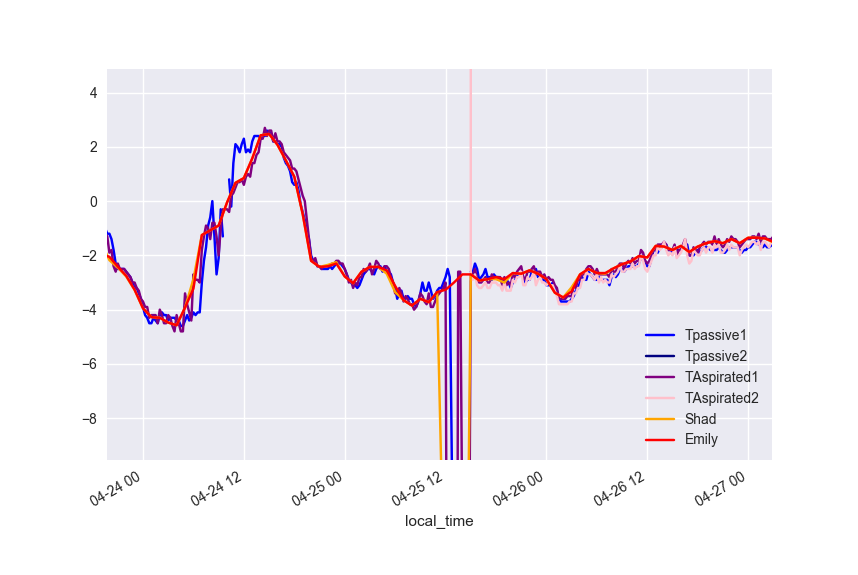

In [46]:
%matplotlib notebook
ax=raw_dat[['Tpassive1', 'Tpassive2', 'TAspirated1', 'TAspirated2']].plot(color=['blue', 'navy', 'purple', 'pink'], ylim=[-35, 35])
shadT1.plot(ax=ax, color='orange')
emilyT1.plot(ax=ax, color='red')
#krista_temp.plot(ax=ax, color='purple')
plt.legend()

In [16]:
if timing=='hourly':
    shad_dat['local_time']=shad_dat.index-datetime.timedelta(hours=0.5) #Shad had his on the 1/2 hr
    shad_dat=shad_dat.set_index('local_time')

In [17]:
if timing=='hourly':
    shad_precip=shad_dat.TPGhourlyCatch
if timing=='daily':
    shad_precip=shad_dat.TPGDailyCatch
if timing=='L1':
    shad_precip=shad_dat.TPGIncremental
    emily_precip=emily_dat.TPGCumulative-emily_dat.TPGCumulative.shift(1)

else:
    emily_precip=emily_dat.TPGIncremental
raw_precip=raw_dat.TPGCumulative

In [18]:
raw_precip2=(raw_precip-raw_precip[raw_precip.first_valid_index()])*1000
if timing=='L1':
    shad_precip=shad_precip*1000

In [19]:
shad_precip.name='Shad'
emily_precip.name='Emily'
raw_precip2.name='raw TPG'

In [39]:
mrgd=pd.concat([shad_precip, emily_precip], axis=1)

In [50]:
#Find times where 2 do not match up well
weird_shad_high=mrgd.Shad.cumsum()[(mrgd.Shad>4) & (mrgd.Emily<1)].copy()
weird_emily_high=mrgd.Emily.cumsum()[(mrgd.Emily>4) & (mrgd.Shad<1)].copy()

In [51]:
weird_shad_high.name='Increases in Shad TS; none in Emily'
weird_emily_high.name='Increase in Emily TS; none in Shad'

<IPython.core.display.Javascript object>


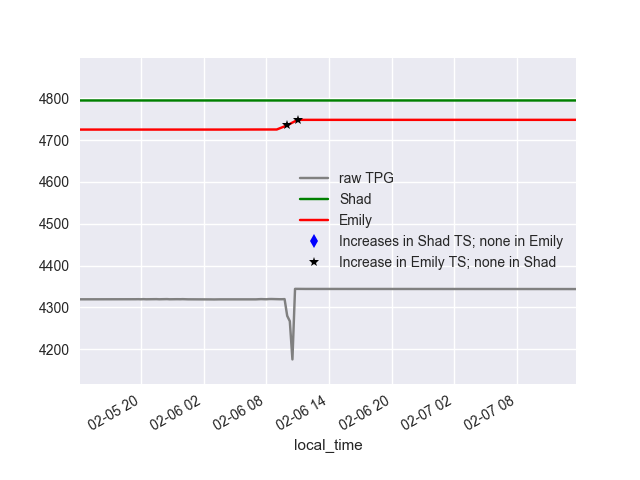

In [65]:
%matplotlib notebook
raw_precip3=raw_precip2+4400
ax=raw_precip3.plot(color='grey')
shad_precip.cumsum().plot(ax=ax, color='green')
emily_precip.cumsum().plot(ax=ax, color='red')
ln3=ax.plot(weird_shad_high.index, weird_shad_high, 'bd')
ln3=ax.plot(weird_emily_high.index, weird_emily_high, 'k*')
plt.legend()

<IPython.core.display.Javascript object>


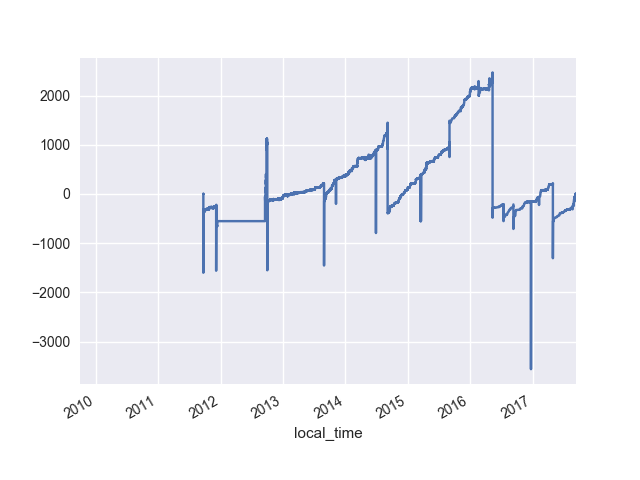

In [23]:
%matplotlib notebook
raw_precip2.plot()

In [24]:
raw_precip3=raw_precip2.copy()-raw_precip2['2016-04-01 00:00:00'].values

<IPython.core.display.Javascript object>


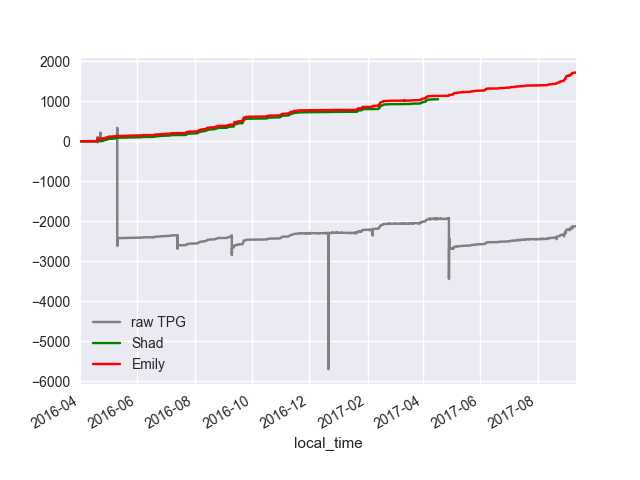

In [40]:
%matplotlib notebook
ax=raw_precip3['2016-04':].plot(color='grey')
shad_precip['2016-04':].cumsum().plot(ax=ax, color='green')
emily_precip['2016-04':].cumsum().plot(ax=ax, color='red')
plt.legend()

In [25]:
dPrecip=raw_precip3-raw_precip3.shift(1)

In [50]:
def correlation_plot (col_x, col_y, corr_dat, label, color):
    '''
    create plot of correlation; input is quoted name of x-column "column", y-column, and data (no quotes).
    label = whatever you want to label the plot
    '''
    #Calculate OLS linear fit
    lm1=sm.ols(col_y + '~' + col_x, data=corr_dat).fit() #fit
    #Make pretty p-value
    p_print=pretty_p_val(lm1.pvalues[1])
    #Store equation text for plot
    eq_text=col_y + "="+str(lm1.params[1])[0:4] + "x " + col_x + "+" + str(lm1.params[0])[0:6]+ "; R^2= " + str(lm1.rsquared_adj)[0:4] + "; " + p_print

    #Calculate Kendall Tau
    clean_dat=corr_dat.copy()
    clean_dat=corr_dat.dropna(axis=0, how='any')
    kendall_tau, kt_pval=scipy.stats.stats.kendalltau(clean_dat[col_y], clean_dat[col_x], nan_policy="omit")
    kt_pval=pretty_p_val(kt_pval)

    #plot and labels
    sns.jointplot(x=col_x, y=col_y, data=corr_dat, kind='reg', size=10, color=color, stat_func=kendalltau)
    plt.ylabel(col_y+ ' (mm w.e.)')
    plt.xlabel(col_x + ' (mm w. e.)')
    plt.title(label)
    plt.tight_layout(pad=2)
    plt.figtext(0.93, 0.01, eq_text, horizontalalignment='right')
    #plt.figtext(0.78, 0.70, "K. Tau = " + str(kendall_tau)[0:4] + "; " + kt_pval, horizontalalignment='right')
    
def pretty_p_val(pval):
    if round(pval,3)<0.01:
        p_print="p< 0.01"
    else:
        val="%f" %pval
        p_print="p= " +val[0:4]
        print(p_print)
    return p_print

C:\Users\ehbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


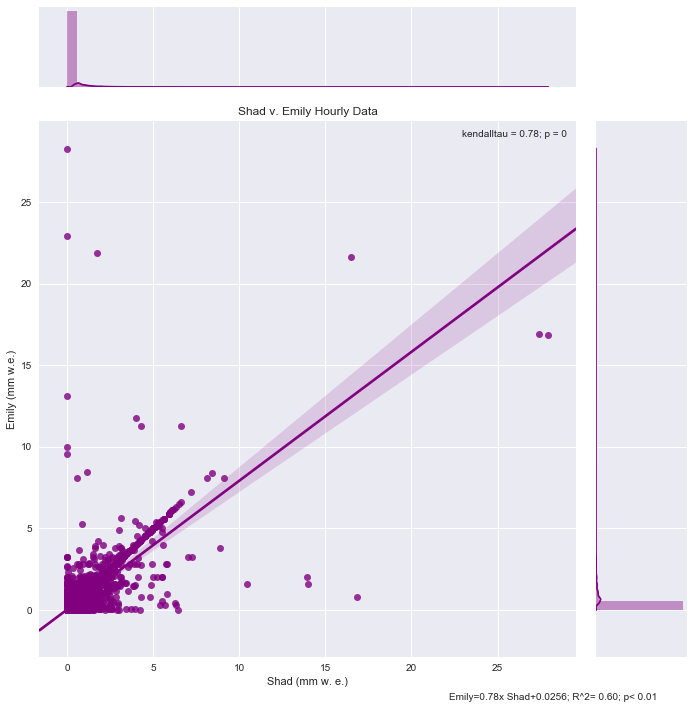

In [55]:
from scipy.stats import kendalltau
%matplotlib inline
correlation_plot('Shad', 'Emily', mrgd, label='Shad v. Emily Hourly Data', color='purple')

In [ ]:
from scipy.stats import kendalltau

%matplotlib inline
sns.jointplot(mrgd.Emily, mrgd.Shad, kind="hex", stat_func=kendalltau, color="green")

<IPython.core.display.Javascript object>


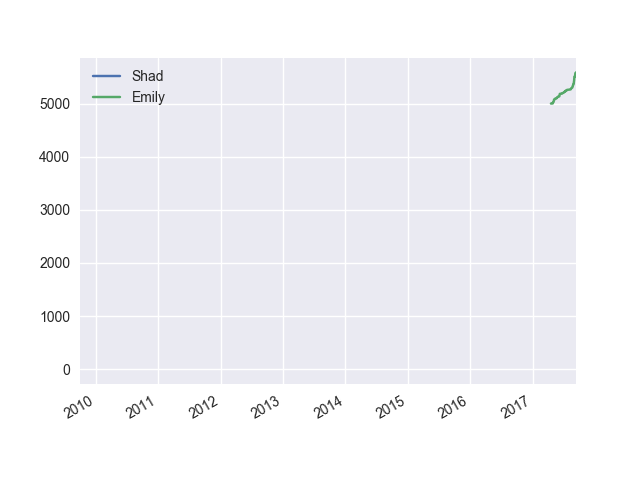

In [114]:
mrgd.cumsum().plot()

In [45]:
dRaw=raw_precip2-raw_precip2.shift(1)

<IPython.core.display.Javascript object>


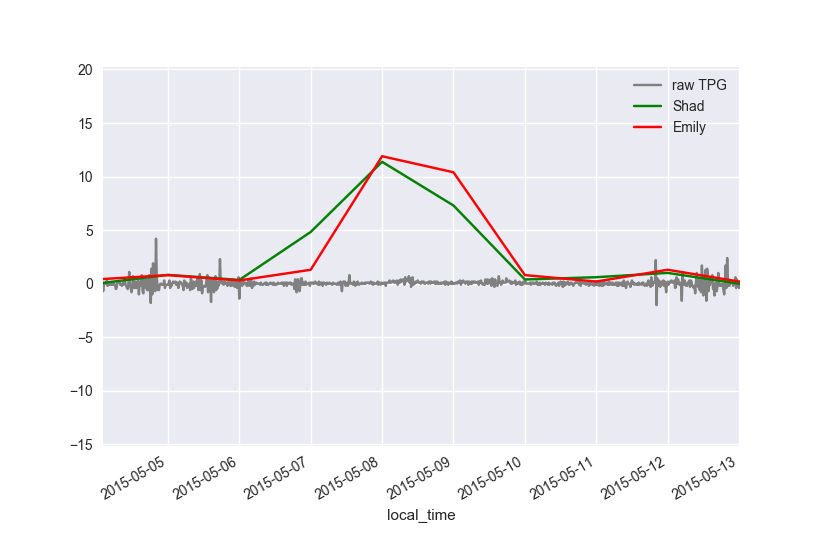

In [48]:
%matplotlib notebook
ax=dRaw.plot(color='grey')
shad_precip.plot(ax=ax, color='green')
emily_precip.plot(ax=ax, color='red')
plt.legend()

In [ ]:
dRaw.plot()